In [8]:
# Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

import matplotlib.pyplot as plt

In [9]:
# Fetch Images count from folders

count = 0
dirs = os.listdir("flowers/")

for folder in dirs:
    path = os.path.join("Flowers", folder)
    if os.path.isdir(path):
        files = os.listdir(path)
        print(f"{folder} Folder has {len(files)} Images")
        count += len(files)

print(f"Total Images in Flowers Folder: {count}")

daisy Folder has 764 Images
dandelion Folder has 1052 Images
rose Folder has 784 Images
sunflower Folder has 733 Images
tulip Folder has 984 Images
Total Images in Flowers Folder: 4317


In [10]:
# Load Images into Arrays as Dataset

base_dir = "flowers/"
img_size = 180
batch = 32

train_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed=123,
    validation_split=0.2,
    subset="training",
    batch_size=batch,
    image_size=(img_size, img_size),
)

validatin_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed=123,
    validation_split=0.2,
    subset="validation",
    batch_size=batch,
    image_size=(img_size, img_size),
)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [11]:
flower_names = train_dataset.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

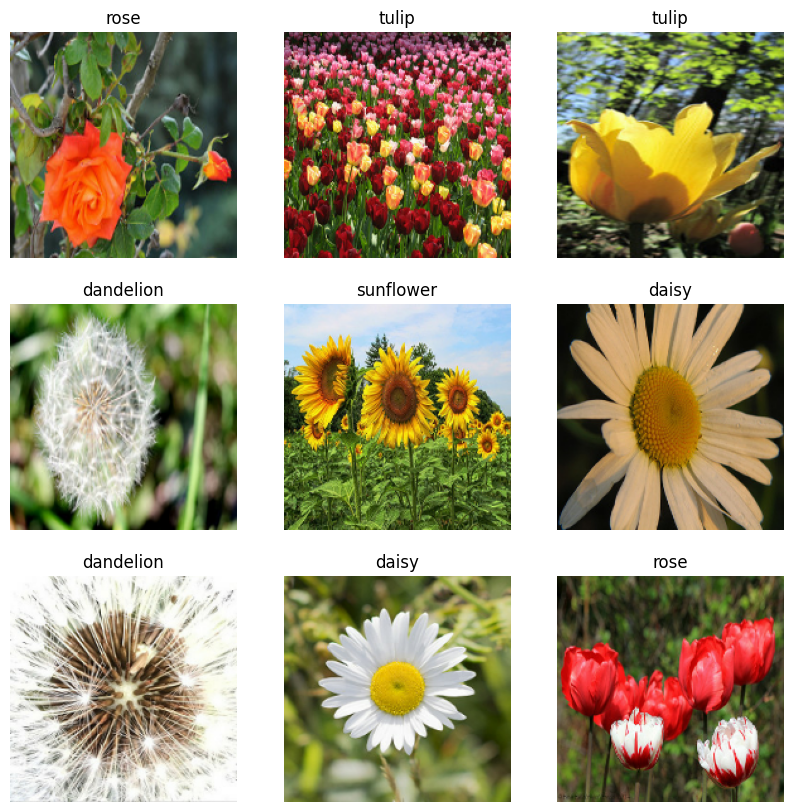

In [12]:
i = 0
plt.figure(figsize=(10, 10))

for images, labels in train_dataset.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(flower_names[labels[i]])
        plt.axis("off")

In [13]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validatin_dataset = validatin_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
# Data Augmentation
data_augmentation = Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(img_size, img_size, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

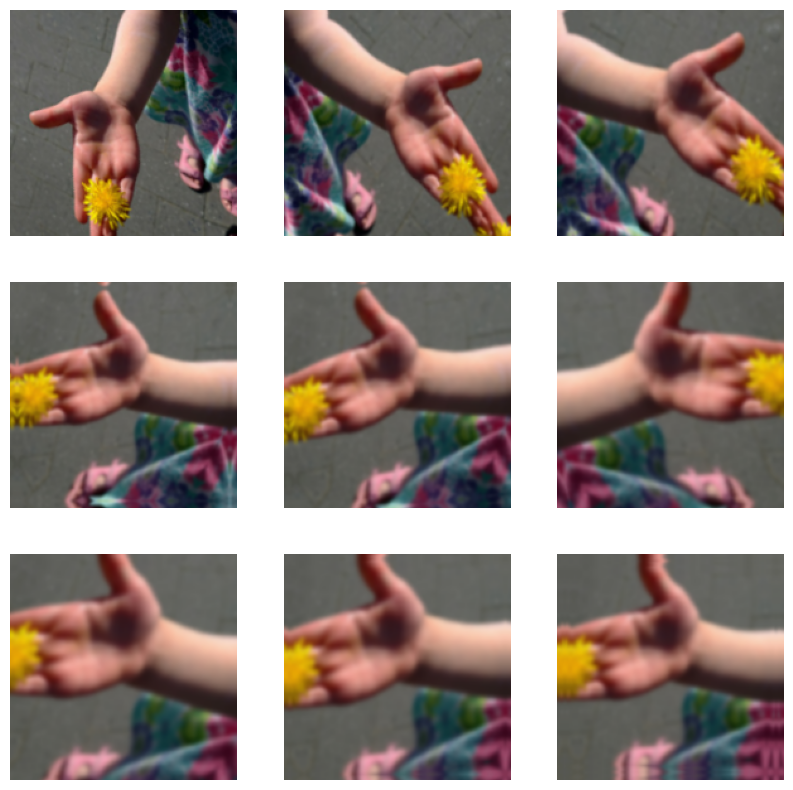

In [17]:
i = 0
plt.figure(figsize=(10, 10))

for images, labels in train_dataset.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[0].numpy().astype("uint8"))
        plt.axis("off")

In [18]:
# Model Creation
model = Sequential(
    [
        data_augmentation,
        layers.Rescaling(1.0 / 255),
        Conv2D(16, 3, padding="same", activation="relu"),
        MaxPooling2D(),
        Conv2D(32, 3, padding="same", activation="relu"),
        MaxPooling2D(),
        Conv2D(64, 3, padding="same", activation="relu"),
        MaxPooling2D(),
        Dropout(0.2),
        Flatten(),
        Dense(128, activation="relu"),
        Dense(5),
    ]
)

In [19]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history=model.fit(train_dataset, epochs=15, validation_data=validatin_dataset)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 46s 404ms/step - accuracy: 0.4540 - loss: 1.2971 - val_accuracy: 0.5608 - val_loss: 1.1097
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 374ms/step - accuracy: 0.6013 - loss: 1.0224 - val_accuracy: 0.6373 - val_loss: 0.9500
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 36s 338ms/step - accuracy: 0.6245 - loss: 0.9514 - val_accuracy: 0.6408 - val_loss: 0.8801
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 37s 339ms/step - accuracy: 0.6627 - loss: 0.8758 - val_accuracy: 0.6651 - val_loss: 0.8691
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 37s 340ms/step - accuracy: 0.6752 - loss: 0.8233 - val_accuracy: 0.6837 - val_loss: 0.8412
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 37s 340ms/step - accuracy: 0.7006 - loss: 0.7997 - val_accuracy: 0.6918 - val_loss: 0.8077
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 37s 339ms/step - accuracy: 0.7128 - loss: 0.7498 - val_accuracy: 0.6698 - val_loss: 0.8988
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 37s 342ms/step - accuracy: 0.7166 - loss: 0

In [39]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180, 180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)

    prediction = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(prediction[0])

    outcome = 'The image belongs to ' + flower_names[np.argmax(result)] + ' with a score of ' + str(np.max(result)*100)
    return outcome

In [40]:
classify_images('sample\sunflower.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Rezvi\AppData\Local\Temp\ipykernel_6716\2665295722.py:1: SyntaxWarning: invalid escape sequence '\s'
  classify_images('sample\sunflower.jpg')


'The image belongs to sunflower with a score of 98.41009'